In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv('salary_class.csv')

In [3]:
df

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      48842 non-null  int64 
 1   age             48842 non-null  int64 
 2   workclass       46043 non-null  object
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


# EDA

### 범주형 자료
- workclass, education, marital-status, occupation, relationship, race, sex, native-country

In [50]:
category = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [51]:
for c in category:
  print(c,df[c].isnull().sum())

workclass 2799
education 0
marital-status 0
occupation 2809
relationship 0
race 0
sex 0
native-country 857


- workclass, occupation, native-country 결측치 존재, 많아 보임

### 범주형 자료 class 비율 파악하기

- workclass
  - private의 경우 class의 값 차이가 크지만, self-emp-inc 제외 모두 class=0의 값이 더 높다.

In [52]:
pd.crosstab(df['workclass'], df['class'])

class,0,1
workclass,,
Federal-gov,871,561
Local-gov,2209,927
Never-worked,10,0
Private,26519,7387
Self-emp-inc,757,938
Self-emp-not-inc,2785,1077
State-gov,1451,530
Without-pay,19,2


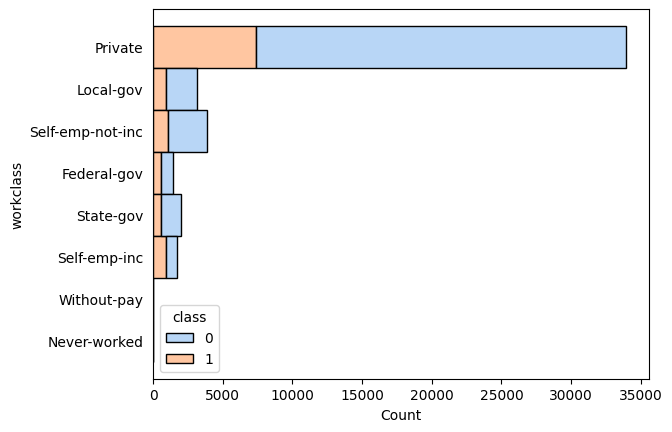

In [58]:
ax = sns.histplot(y='workclass', hue='class', multiple='stack', palette='pastel', shrink=1, data=df)
ax.tick_params(left=False)

- education
  - Prof-school 제외, 모두 class=0의 값이 높다.

In [59]:
pd.crosstab(df['education'], df['class'])

class,0,1
education,,
10th,1302,87
11th,1720,92
12th,609,48
1st-4th,239,8
5th-6th,482,27
7th-8th,893,62
9th,715,41
Assoc-acdm,1188,413
Assoc-voc,1539,522


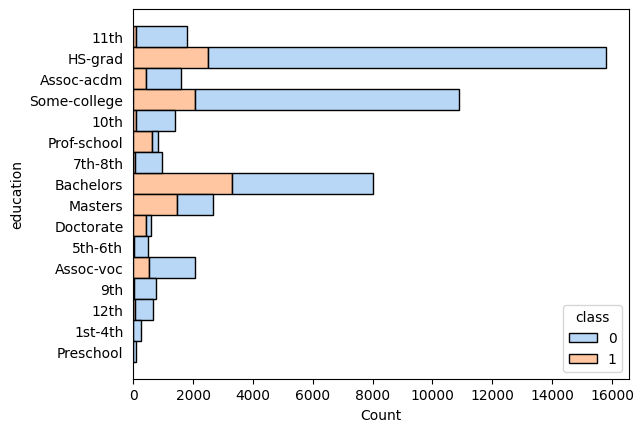

In [60]:
ax = sns.histplot(y='education', hue='class', multiple='stack', palette='pastel', shrink=1, data=df)
ax.tick_params(left=False)

- marital-status
  - 모두 class=0의 값이 더 높음

In [61]:
pd.crosstab(df['marital-status'], df['class'])

class,0,1
marital-status,,
Divorced,5962,671
Married-AF-spouse,23,14
Married-civ-spouse,12395,9984
Married-spouse-absent,570,58
Never-married,15384,733
Separated,1431,99
Widowed,1390,128


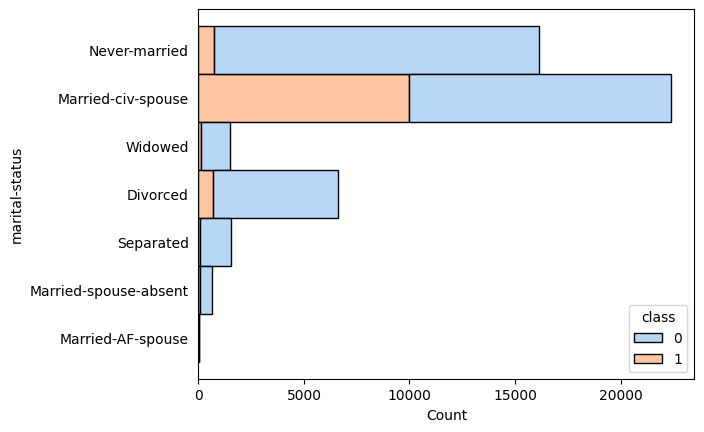

In [62]:
ax = sns.histplot(y='marital-status', hue='class', multiple='stack', palette='pastel', shrink=1, data=df)
ax.tick_params(left=False)

- occupation
  - 모두 class=0의 값이 더 높음

In [63]:
pd.crosstab(df['occupation'], df['class'])

class,0,1
occupation,,
Adm-clerical,4843,768
Armed-Forces,10,5
Craft-repair,4729,1383
Exec-managerial,3178,2908
Farming-fishing,1317,173
Handlers-cleaners,1934,138
Machine-op-inspct,2650,372
Other-service,4719,204
Priv-house-serv,239,3


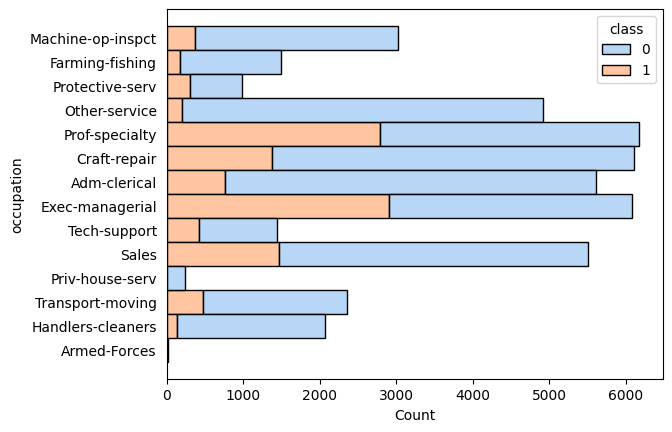

In [64]:
ax = sns.histplot(y='occupation', hue='class', multiple='stack', palette='pastel', shrink=1, data=df)
ax.tick_params(left=False)

- relationship
  - 모두 class=0의 값이 높음

In [65]:
pd.crosstab(df['relationship'], df['class'])

class,0,1
relationship,,
Husband,10870,8846
Not-in-family,11307,1276
Other-relative,1454,52
Own-child,7470,111
Unmarried,4816,309
Wife,1238,1093


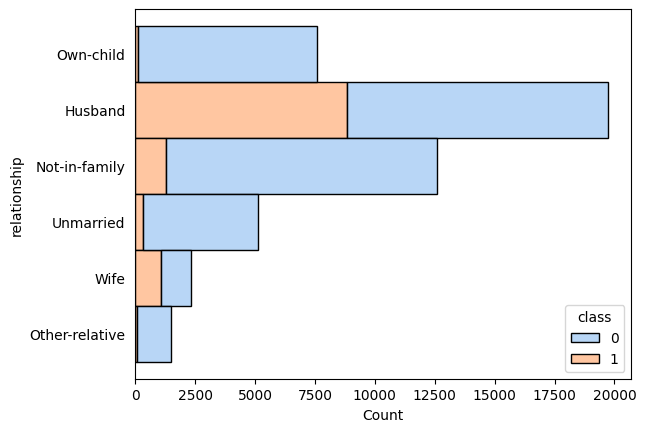

In [66]:
ax = sns.histplot(y='relationship', hue='class', multiple='stack', palette='pastel', shrink=1, data=df)
ax.tick_params(left=False)

- race
  - 모두 class=0의 값이 높음

In [67]:
pd.crosstab(df['race'], df['class'])

class,0,1
race,,
Amer-Indian-Eskimo,415,55
Asian-Pac-Islander,1110,409
Black,4119,566
Other,356,50
White,31155,10607


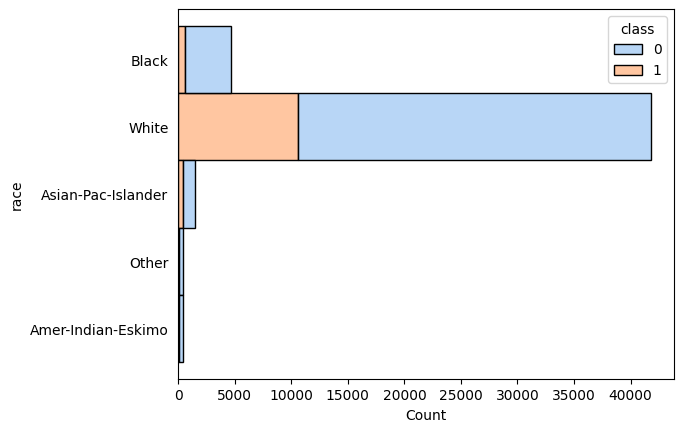

In [68]:
ax = sns.histplot(y='race', hue='class', multiple='stack', palette='pastel', shrink=1, data=df)
ax.tick_params(left=False)

- sex
  - 모두 class=0의 값이 더 높음

In [69]:
pd.crosstab(df['sex'], df['class'])

class,0,1
sex,,
Female,14423,1769
Male,22732,9918


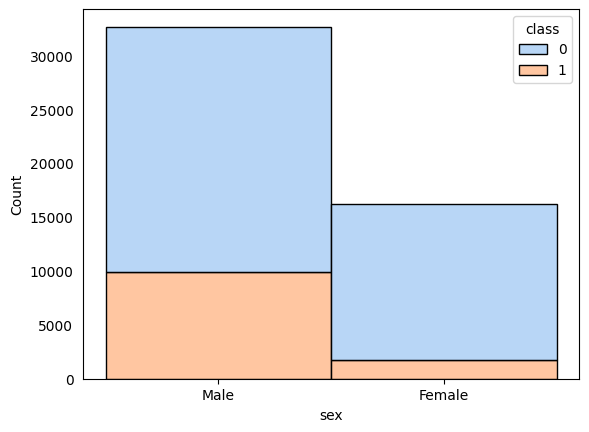

In [73]:
ax = sns.histplot(x='sex', hue='class', multiple='stack', palette='pastel', data=df)
ax.tick_params(left=False)

- native-country
  - 모두 class=0의 값이 더 높음

In [74]:
pd.crosstab(df['native-country'], df['class'])

class,0,1
native-country,,
Cambodia,19,9
Canada,119,63
China,86,36
Columbia,81,4
Cuba,104,34
Dominican-Republic,98,5
Ecuador,39,6
El-Salvador,144,11
England,80,47


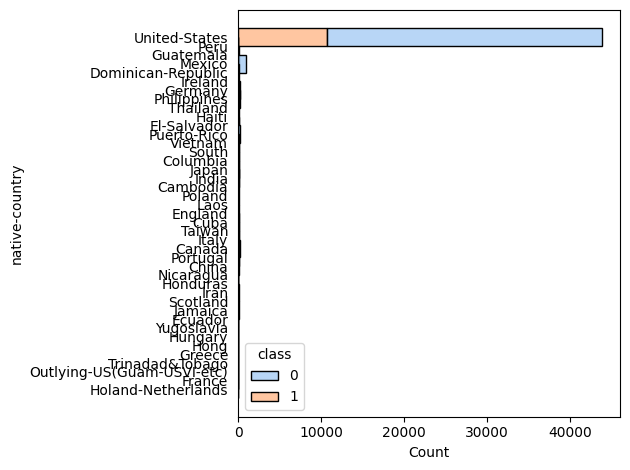

In [87]:
ax = sns.histplot(y='native-country', hue='class', multiple='stack', palette='pastel', shrink=2, data=df)
plt.tight_layout()
ax.tick_params(left=False)
plt.show()

- 범주형 자료 경우 workclass, education의 경우를 제외하면 전부 class=0이 비율이 더 높다.

### 이산형 자료
- Unnamed:0, age, education-num, capital-gain, capital-loss, hours-per-week, class


In [89]:
df.describe(include='all')

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842.000000
unique,NaN,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,NaN
mean,24420.500000,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,0.239282
std,14099.615261,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,0.426649
min,0.000000,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,12210.250000,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,24420.500000,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,36630.750000,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [92]:
df_c = df[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']]

<Axes: title={'center': 'Person Correlation of Features'}>

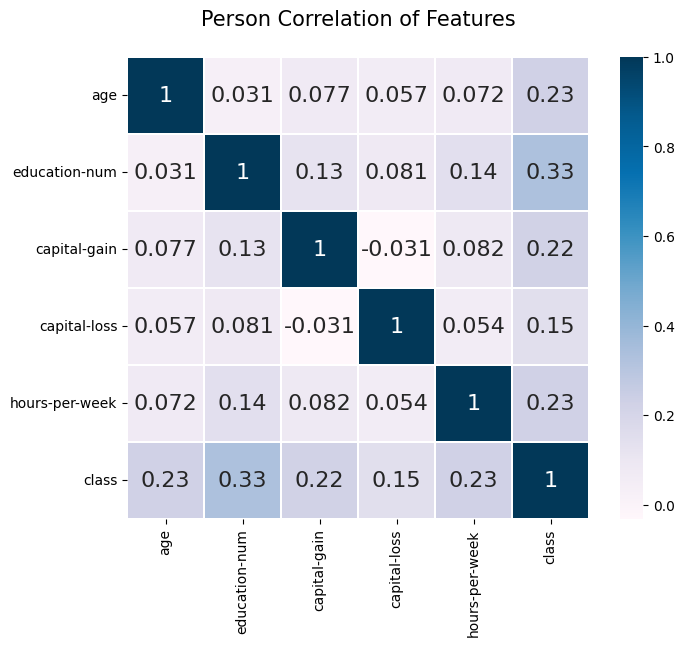

In [95]:
colormap = plt.cm.PuBu
plt.figure(figsize=(8, 6))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(df_c.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

- class와 다른 칼럼들 모두 양의 상관관계를 가지고 있다.
- education-num > age & hours-per-week > capital-gain > capital-loss 순으로 상관관계가 높다.

# Modeling
### 1. 범주형 자료 workclass, education 제외, 수치형 자료 capital-loss 제외

In [135]:
model_1 = df[['marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','hours-per-week','capital-gain','class']]

In [136]:
model_1 = pd.get_dummies(model_1)
model_1

,education-num,age,hours-per-week,capital-gain,class,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,9,38,50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,40,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,40,7688,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,30,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,38,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,40,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,20,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [137]:
X_train, X_test, y_train, y_test = train_test_split(model_1.drop('class', axis=1),
                                                    model_1['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy_score(y_test, pred)

0.8090290218559656

In [138]:
model_1_accuracy = accuracy_score(y_test, pred)
model_1_accuracy

0.8090290218559656

### 2. 범주형 자료 education 제외, 수치형 자료 capital-loss 제외

In [139]:
model_2 = df[['workclass','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','hours-per-week','capital-gain','class']]

In [140]:
model_2 = pd.get_dummies(model_2)
model_2

,education-num,age,hours-per-week,capital-gain,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,38,50,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,40,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,40,7688,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,38,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,40,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,20,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [141]:
X_train, X_test, y_train, y_test = train_test_split(model_2.drop('class', axis=1),
                                                    model_2['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_2_accuracy = accuracy_score(y_test, pred)
model_2_accuracy

0.8087730972001843

### 3. 수치형 자료 capital-loss 제외

In [142]:
model_3 = df[['workclass','education','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','hours-per-week','capital-gain','class']]

In [143]:
model_3 = pd.get_dummies(model_3)
model_3

,education-num,age,hours-per-week,capital-gain,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,38,50,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,40,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,40,7688,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,38,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,40,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,20,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [144]:
X_train, X_test, y_train, y_test = train_test_split(model_3.drop('class', axis=1),
                                                    model_3['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_3_accuracy = accuracy_score(y_test, pred)
model_3_accuracy

0.8086195424067154

### 4. 수치형 자료 capital-gain, capital-loss 제외

In [145]:
model_4 = df[['workclass','education','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','hours-per-week','class']]

In [146]:
model_4 = pd.get_dummies(model_4)
model_4

,education-num,age,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,38,50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,40,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,40,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,38,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,40,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,20,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [147]:
X_train, X_test, y_train, y_test = train_test_split(model_4.drop('class', axis=1),
                                                    model_4['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_4_accuracy = accuracy_score(y_test, pred)
model_4_accuracy

0.7806725699953934

### 5. 범주형 자료 workclass, eduation 제외, 수치형 자료 capital-gain, capital-loss 제외

In [148]:
model_5 = df[['marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','hours-per-week','class']]

In [149]:
model_5 = pd.get_dummies(model_5)
model_5

,education-num,age,hours-per-week,class,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,40,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,38,50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,30,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,38,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,20,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [150]:
X_train, X_test, y_train, y_test = train_test_split(model_5.drop('class', axis=1),
                                                    model_5['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_5_accuracy = accuracy_score(y_test, pred)
model_5_accuracy

0.782515227517019

### 6. 범주형 자료 eduation 제외, 수치형 자료 capital-gain, capital-loss 제외

In [151]:
model_6 = df[['workclass','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','hours-per-week','class']]

In [152]:
model_6 = pd.get_dummies(model_6)
model_6

,education-num,age,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,38,50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,40,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,40,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,38,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,40,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,20,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [153]:
X_train, X_test, y_train, y_test = train_test_split(model_6.drop('class', axis=1),
                                                    model_6['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_6_accuracy = accuracy_score(y_test, pred)
model_6_accuracy

0.7822081179300814

### 7. 범주형 자료만

In [154]:
model_7 = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','class']]

In [155]:
model_7 = pd.get_dummies(model_7)
model_7

,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [156]:
X_train, X_test, y_train, y_test = train_test_split(model_7.drop('class', axis=1),
                                                    model_7['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_7_accuracy = accuracy_score(y_test, pred)
model_7_accuracy

0.8220811793008138

### 8. 수치형 자료만

In [157]:
model_8 = df[['education-num', 'age', 'hours-per-week', 'capital-gain', 'capital-loss','class']]

In [158]:
model_8 = pd.get_dummies(model_8)
model_8

,education-num,age,hours-per-week,capital-gain,capital-loss,class
0,7,25,40,0,0,0
1,9,38,50,0,0,0
2,12,28,40,0,0,1
3,10,44,40,7688,0,1
4,10,18,30,0,0,0
...,...,...,...,...,...,...
48837,12,27,38,0,0,0
48838,9,40,40,0,0,1
48839,9,58,40,0,0,0
48840,9,22,20,0,0,0


In [159]:
X_train, X_test, y_train, y_test = train_test_split(model_8.drop('class', axis=1),
                                                    model_8['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_8_accuracy = accuracy_score(y_test, pred)
model_8_accuracy

0.8162972820801556

### 9. 수치형 자료 age 제외

In [163]:
model_9 = df[['workclass','education','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','hours-per-week','capital-gain','capital-loss','class']]

In [164]:
model_9 = pd.get_dummies(model_9)
model_9

,education-num,hours-per-week,capital-gain,capital-loss,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,40,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,50,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,12,40,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,40,7688,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,10,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,38,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,40,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,20,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [165]:
X_train, X_test, y_train, y_test = train_test_split(model_9.drop('class', axis=1),
                                                    model_9['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_9_accuracy = accuracy_score(y_test, pred)
model_9_accuracy

0.8393816860316323

### 10. 수치형 자료 age, hours-per-week 제외

In [166]:
model_10 = df[['workclass','education','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','capital-gain','capital-loss','class']]

In [167]:
model_10 = pd.get_dummies(model_10)
model_10

,education-num,capital-gain,capital-loss,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,7688,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [168]:
X_train, X_test, y_train, y_test = train_test_split(model_10.drop('class', axis=1),
                                                    model_10['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_10_accuracy = accuracy_score(y_test, pred)
model_10_accuracy

0.8519731790960741

### 11. 범주형 workclass, 수치형 age 제외

In [169]:
model_11 = df[['education','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','hours-per-week','capital-gain','capital-loss','class']]

In [170]:
model_11 = pd.get_dummies(model_11)
model_11

,education-num,hours-per-week,capital-gain,capital-loss,class,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,40,7688,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [171]:
X_train, X_test, y_train, y_test = train_test_split(model_11.drop('class', axis=1),
                                                    model_11['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_11_accuracy = accuracy_score(y_test, pred)
model_11_accuracy

0.8434252955929774

### 12. 범주형 workclass, 수치형 age, hours-per-week 제외

In [172]:
model_12 = df[['education','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','capital-gain','capital-loss','class']]

In [173]:
model_12 = pd.get_dummies(model_12)
model_12

,education-num,capital-gain,capital-loss,class,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,7688,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [174]:
X_train, X_test, y_train, y_test = train_test_split(model_12.drop('class', axis=1),
                                                    model_12['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_12_accuracy = accuracy_score(y_test, pred)
model_12_accuracy

0.8567845626247633

In [248]:
model_12.to_csv('data_0820.csv')

### 13. 범주형 workclass, education 수치형 age, hours-per-week 제외


In [175]:
model_13 = df[['marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','capital-gain','capital-loss','class']]

In [176]:
model_13 = pd.get_dummies(model_13)
model_13

,education-num,capital-gain,capital-loss,class,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,7688,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [177]:
X_train, X_test, y_train, y_test = train_test_split(model_13.drop('class', axis=1),
                                                    model_13['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_13_accuracy = accuracy_score(y_test, pred)
model_13_accuracy

0.8564774530378256

### 14. 수치형 자료 hours-per-week 제외

In [178]:
model_14 = df[['workclass','education','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','capital-gain','capital-loss','class']]

In [179]:
model_14 = pd.get_dummies(model_14)
model_14

,education-num,age,capital-gain,capital-loss,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,38,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,7688,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [180]:
X_train, X_test, y_train, y_test = train_test_split(model_14.drop('class', axis=1),
                                                    model_14['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_14_accuracy = accuracy_score(y_test, pred)
model_14_accuracy

0.8263295285867841

### 15. 수치형 자료 hours-per-week, 범주형 workclass 제외

In [181]:
model_15 = df[['education','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','capital-gain','capital-loss','class']]

In [182]:
model_15 = pd.get_dummies(model_15)
model_15

,education-num,age,capital-gain,capital-loss,class,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,38,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,7688,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [183]:
X_train, X_test, y_train, y_test = train_test_split(model_15.drop('class', axis=1),
                                                    model_15['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_15_accuracy = accuracy_score(y_test, pred)
model_15_accuracy

0.8292470696626913

### 16. 16. 수치형 자료 hours-per-seek, 범주형 work class, education 제외

In [184]:
model_16 = df[['marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','age','capital-gain','capital-loss','class']]

In [185]:
model_16 = pd.get_dummies(model_16)
model_16

,education-num,age,capital-gain,capital-loss,class,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,9,38,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,7688,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [186]:
X_train, X_test, y_train, y_test = train_test_split(model_16.drop('class', axis=1),
                                                    model_16['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_16_accuracy = accuracy_score(y_test, pred)
model_16_accuracy

0.8271484874852844

### 17. 범주형 education, 수치형 age, hours-per-week 제외

In [205]:
model_17 = df[['workclass','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','capital-gain','capital-loss','class']]

In [206]:
model_17 = pd.get_dummies(model_17)
model_17

,education-num,capital-gain,capital-loss,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,7688,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [207]:
X_train, X_test, y_train, y_test = train_test_split(model_17.drop('class', axis=1),
                                                    model_17['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_17_accuracy = accuracy_score(y_test, pred)
model_17_accuracy

0.8513589599221989

### 18. 범주형 education, 수치형 hours-per-week 제외

In [208]:
model_18 = df[['workclass','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','capital-gain','capital-loss','age','class']]

In [209]:
model_18 = pd.get_dummies(model_18)
model_18

,education-num,capital-gain,capital-loss,age,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,25,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,38,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,12,0,0,28,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,7688,0,44,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,27,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,0,0,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,58,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,22,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [210]:
X_train, X_test, y_train, y_test = train_test_split(model_18.drop('class', axis=1),
                                                    model_18['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_18_accuracy = accuracy_score(y_test, pred)
model_18_accuracy

0.8235655423043456

### 19. 범주형 education, 수치형 age 제외

In [211]:
model_19 = df[['workclass','marital-status','occupation','relationship', 'race', 'sex', 'native-country','education-num','capital-gain','capital-loss','hours-per-week','class']]

In [212]:
model_19 = pd.get_dummies(model_19)
model_19

,education-num,capital-gain,capital-loss,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,50,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,12,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,7688,0,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,38,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,0,0,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,40,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,20,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [213]:
X_train, X_test, y_train, y_test = train_test_split(model_19.drop('class', axis=1),
                                                    model_19['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_19_accuracy = accuracy_score(y_test, pred)
model_19_accuracy

0.8392793161693197

### 20. 범주형 전체, 수치형 education-num만

In [216]:
model_20 = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','education-num','class']]

In [217]:
model_20 = pd.get_dummies(model_20)
model_20

,education-num,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [218]:
X_train, X_test, y_train, y_test = train_test_split(model_20.drop('class', axis=1),
                                                    model_20['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_20_accuracy = accuracy_score(y_test, pred)
model_20_accuracy

0.8224394738189077

### 21. 범주형 전체, 수치형 capital-gain, capital-loss 제외

In [220]:
model_21 = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','education-num','age','hours-per-week','class']]

In [221]:
model_21 = pd.get_dummies(model_21)
model_21

,education-num,age,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,25,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,38,50,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,28,40,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,44,40,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,18,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,27,38,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,40,40,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,58,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,22,20,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [222]:
X_train, X_test, y_train, y_test = train_test_split(model_21.drop('class', axis=1),
                                                    model_21['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_21_accuracy = accuracy_score(y_test, pred)
model_21_accuracy

0.783283001484363

### 22. 수치형 자료 age, hours-per-week 제외

In [223]:
model_22 = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','education-num','capital-gain','capital-loss','class']]

In [224]:
model_22 = pd.get_dummies(model_22)
model_22

,education-num,capital-gain,capital-loss,class,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,7,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10,7688,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,12,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,9,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,9,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [225]:
X_train, X_test, y_train, y_test = train_test_split(model_22.drop('class', axis=1),
                                                    model_22['class'],
                                                    test_size=0.4, random_state=1)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

model_22_accuracy = accuracy_score(y_test, pred)
model_22_accuracy

0.8520243640272304

---

In [226]:
name = ['model_1_accuracy', 'model_2_accuracy', 'model_3_accuracy', 'model_4_accuracy', 'model_5_accuracy', 'model_6_accuracy', 'model_7_accuracy', 'model_8_accuracy', 'model_9_accuracy', 'model_10_accuracy', 'model_11_accuracy', 'model_12_accuracy', 'model_13_accuracy', 'model_14_accuracy', 'model_15_accuracy', 'model_16_accuracy', 'model_17_accuracy', 'model_18_accuracy', 'model_19_accuracy','model_20_accuracy','model_21_accuracy','model_22_accuracy']

In [227]:
accuracy = [model_1_accuracy, model_2_accuracy, model_3_accuracy, model_4_accuracy, model_5_accuracy, model_6_accuracy, model_7_accuracy, model_8_accuracy, model_9_accuracy, model_10_accuracy, model_11_accuracy, model_12_accuracy, model_13_accuracy, model_14_accuracy, model_15_accuracy, model_16_accuracy, model_17_accuracy, model_18_accuracy, model_19_accuracy, model_20_accuracy, model_21_accuracy, model_22_accuracy]
accuracy_model = pd.DataFrame(accuracy, index=name, columns=['accuracy'])

In [228]:
accuracy_model

,accuracy
model_1_accuracy,0.809029
model_2_accuracy,0.808773
model_3_accuracy,0.808620
model_4_accuracy,0.780673
model_5_accuracy,0.782515
model_6_accuracy,0.782208
model_7_accuracy,0.822081
model_8_accuracy,0.816297
model_9_accuracy,0.839382
model_10_accuracy,0.851973


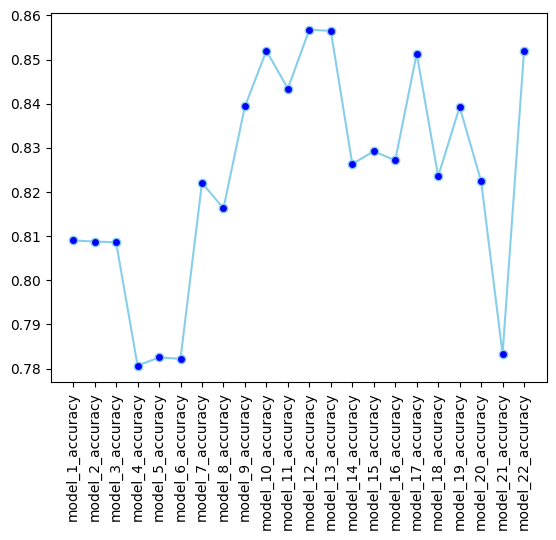

In [242]:
plt.plot(name, accuracy_model['accuracy'], color='skyblue',marker='o', markerfacecolor='blue', markersize=6)
plt.xticks(rotation=90)
plt.show()

In [247]:
accuracy_model.idxmax(axis=0)

accuracy    model_12_accuracy
dtype: object

범주형 workclass, 수치형 age, hours-per-week 제외를 한 model_12의 정확도가 가장 높다.